## SMOTE (Synthetic Minority Oversampling Technique) 
SMOTE (Synthetic Minority Over-sampling Technique) is an upsampling method that creates synthetic (artificial) samples for the minority class instead of just duplicating existing ones.

How it works:

1. Select a minority class sample (let's call it point A)
2. Find its k nearest neighbors from the same minority class (typically k=5)
3. Randomly choose one neighbor (point B)
4. Create a synthetic sample along the line between A and B using interpolation:
5. Repeat until the minority class is balanced

Visual explanation:
Key differences from simple upsampling:

| Simple Upsampling | SMOTE |
|-------------------|-------|
| Duplicates exact copies | Creates new, unique samples |
| Higher overfitting risk | Lower overfitting risk |
| No new information | Adds variation |
| Exact same feature values | Interpolated feature values |

Why it's better:

•  Reduces overfitting: Model sees variations, not just copies
•  Generalizes better: Synthetic samples fill the feature space
•  More realistic: Creates plausible new examples

When to use:

•  Imbalanced classification problems
•  When you can't collect more real data
•  When minority class has smooth, continuous features
•  Not ideal for: categorical features, outliers, or when classes overlap heavily

In [21]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [22]:
# create imbalanced dataset with 2 features
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],
    random_state=42
)

df = pd.DataFrame(X, columns=['f1', 'f2'])
df['target'] = y

print(df)

           f1        f2  target
0    1.073546 -1.101339       0
1    0.755945 -1.172352       0
2    1.354479 -0.948528       0
3    3.103090  0.233485       0
4    1.951888 -0.270157       0
..        ...       ...     ...
995  1.713939  0.451639       1
996  1.509473 -0.794996       0
997 -2.150901 -2.989372       0
998  2.451647 -0.156629       0
999  3.641478  0.756925       0

[1000 rows x 3 columns]


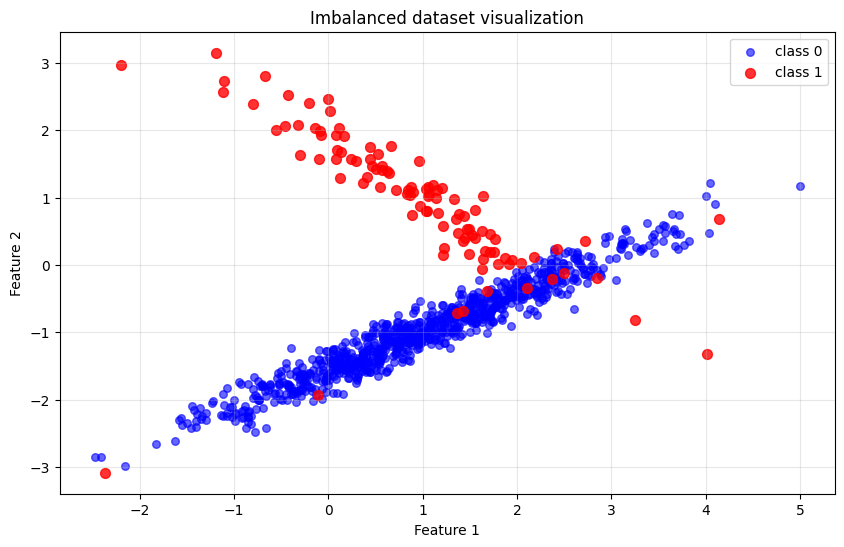

In [23]:
# create a scatter plot
plt.figure(figsize=(10, 6))
class_0 = df[df['target']==0]
class_1 = df[df['target']==1]

plt.scatter(class_0['f1'], class_0['f2'], c='blue', label='class 0', alpha=0.6, s=30)
plt.scatter(class_1['f1'], class_1['f2'], c='red', label='class 1', alpha=0.8, s=50)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Imbalanced dataset visualization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [24]:
X = df[['f1', 'f2']]
y = df[['target']]

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

df_smote = pd.DataFrame(X_resampled, columns=['f1', 'f2'])
df_smote['target'] = y_resampled

print(df_smote)

            f1        f2  target
0     1.073546 -1.101339       0
1     0.755945 -1.172352       0
2     1.354479 -0.948528       0
3     3.103090  0.233485       0
4     1.951888 -0.270157       0
...        ...       ...     ...
1785 -0.887867  2.567409       1
1786  1.333479  0.259539       1
1787  2.401345 -0.181753       1
1788  1.494385  0.491328       1
1789 -1.138164  2.728458       1

[1790 rows x 3 columns]


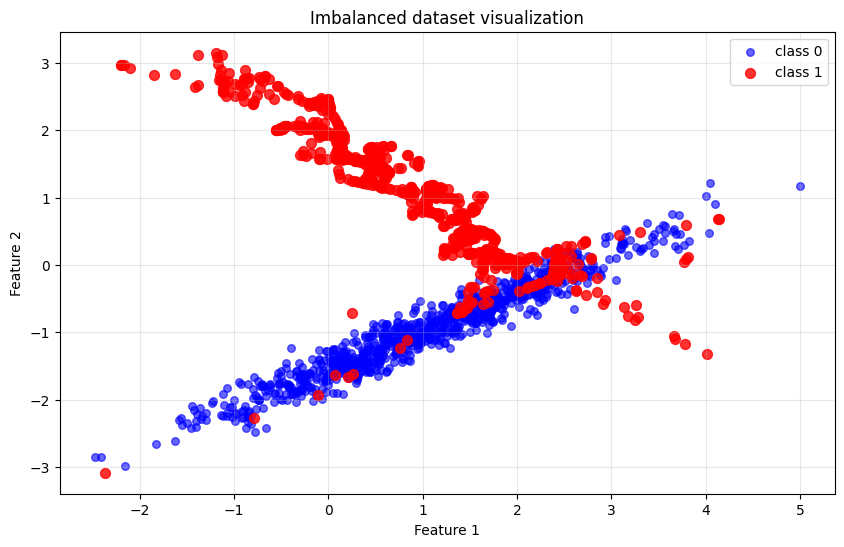

In [25]:
# plotting scatter plot on df_smote dataset
df = df_smote.copy()
plt.figure(figsize=(10, 6))
class_0 = df[df['target']==0]
class_1 = df[df['target']==1]

plt.scatter(class_0['f1'], class_0['f2'], c='blue', label='class 0', alpha=0.6, s=30)
plt.scatter(class_1['f1'], class_1['f2'], c='red', label='class 1', alpha=0.8, s=50)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Imbalanced dataset visualization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()